In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

In [7]:
data_df = pd.read_csv("yahoo_ad_clicks.csv", header = None)  # 32657 rows × 50 columns
data = data_df.values

# Problem 2

In [12]:
def UCB(data):

    miu = [0 for i in range(data.shape[0])]
    n = [1 for i in range(data.shape[0])]
    ucb = [0 for i in range(data.shape[0])]
    
    max_iter = data.shape[1]
    
    total_regret = 0
    total_regret_list = []
    for t in range(1, max_iter):
        for i in range(data.shape[0]):
            ucb[i] = miu[i] + np.sqrt(2 * np.log(t) / n[i])
        j = np.argmax(ucb)
        n[j] += 1
        
        regret = max(miu) - miu[j]
        miu[j] += 1/n[j] * (data[j, t] - miu[j])
        
        total_regret += regret / t
        total_regret_list.append(total_regret)
    return ucb, total_regret, total_regret_list

In [13]:
ucb, total_regret, t_list = UCB(data)

Text(0, 0.5, 'Regret / t')

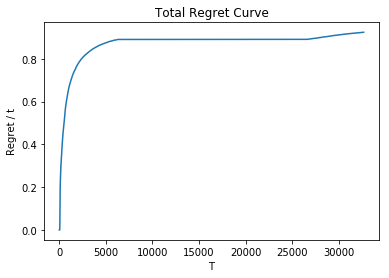

In [14]:
plt.plot(range(len(t_list)), t_list)
plt.title("Total Regret Curve")
plt.xlabel("T")
plt.ylabel("Regret / t")

# Problem 3

In [15]:
def MW(data, eta):
    
    regret = np.zeros(data.shape[1] + 1)
    reward = np.zeros(data.shape[0])
    weights = np.ones(data.shape[0])
    
    for t in range(1, data.shape[1] + 1):
        
        probs = weights / sum(weights)
        selection = np.random.choice(range(data.shape[0]), p = probs) # select the index
        
        weights = np.multiply(weights, (1 - eta * (1 - data[:, t - 1])))
        
        regret[t] = regret[t - 1] + max(reward) - reward[selection]
        reward += (data[:, t - 1] - reward) / t
    return regret

In [23]:
regret = MW(data, 0.022)

Text(0, 0.5, 'Regret')

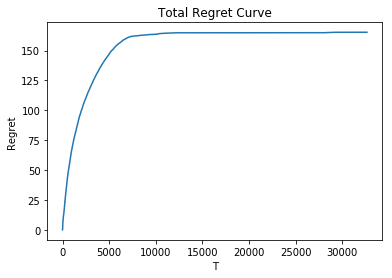

In [24]:
plt.plot(range(len(regret)), regret)
plt.title("Total Regret Curve")
plt.xlabel("T")
plt.ylabel("Regret")